# Project 2: Regression Challenge (HDB Prices)

## 02: Exploratory Visualizations

### Import Libraries


In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [3]:
# Import the cleaned train data
hdb = pd.read_csv('../datasets/train_cleaned.csv')

### Data Dictionary

As we are working off the dataset provided from kaggle, which already has a data dictionary, we will not be repeating this information here. However, we will create a data dictionary here for features we have engineered in notebook 1

|Column| Description|
|------|------------|
|lease_remaining_years| Describes the years left to the lease. As all flats in Singapore has a 99 year lease, this information is important as it would depreciate the value of the flat every year|
|hawker_food_stalls, hawker_market_stalls| Describes whether there is a food stall or market stall at the nearby hawker centre|

### Exploratory Visualizations

In this section, we'll analyze the features we have to try and spot trends and gain insight into the data and how it could possibly affect the resale price

In [4]:
# Take a quick look at the data
hdb.head()

,town,flat_type,floor_area_sqm,flat_model,resale_price,tranc_year,tranc_month,mid,commercial,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,mall_nearest_distance,hawker_nearest_distance,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,lease_remaining_years
0,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,680000.0,2016,5,11,N,142,0,0,0,96,46,0,0,0,1094.090418,154.753357,1,330.083069,0,0,29.427395,1138.633422,1138.633422,84
1,BISHAN,5 ROOM,130.0,Improved,665000.0,2012,7,8,N,112,0,0,0,56,56,0,0,0,866.941448,640.151925,1,903.659703,1,1,58.207761,415.607357,447.894399,65
2,BUKIT BATOK,EXECUTIVE,144.0,Apartment,838000.0,2013,7,14,N,90,0,0,0,0,30,60,0,0,1459.579948,1762.082341,1,1334.251197,1,0,214.747860,498.849039,180.074558,75
3,BISHAN,4 ROOM,103.0,Model A,550000.0,2012,4,3,Y,75,0,0,0,68,7,0,0,0,950.175199,726.215262,1,907.453484,1,1,43.396521,389.515528,389.515528,70
4,YISHUN,4 ROOM,83.0,Simplified,298000.0,2017,12,2,N,48,0,0,0,30,18,0,0,0,729.771895,1540.151439,0,412.343032,0,0,129.422752,401.200584,312.025435,65


#### Which flat types are being sold the most?

From the barchart below, we can see that most of the flat types on sale are 3 room, 4 rooms, 5 rooms and executive. 

In [5]:
# Calculate the number of flat type sold (remove the zeroes from the count)
rooms_1 = len(hdb.loc[hdb['1room_sold'] > 0])
rooms_2 = len(hdb.loc[hdb['2room_sold'] > 0])
rooms_3 = len(hdb.loc[hdb['3room_sold'] > 0])
rooms_4 = len(hdb.loc[hdb['4room_sold'] > 0])
rooms_5 = len(hdb.loc[hdb['5room_sold'] > 0])
rooms_exec = len(hdb.loc[hdb['exec_sold'] > 0])
rooms_multigen = len(hdb.loc[hdb['multigen_sold'] > 0])
rooms_studio = len(hdb.loc[hdb['studio_apartment_sold'] > 0])

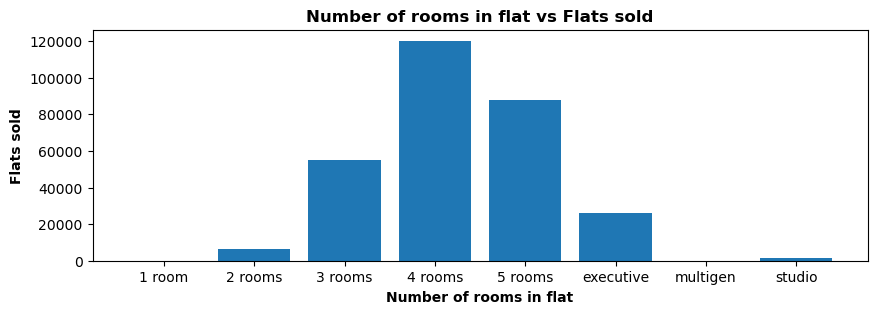

In [6]:
# Plot a bar chart to see the distribution in flat types sold
fig,axes = plt.subplots(figsize=(10,3))
plt.bar(['1 room', '2 rooms', '3 rooms', '4 rooms', '5 rooms', 'executive', 
         'multigen', 'studio'], [rooms_1, rooms_2, rooms_3, rooms_4, rooms_5, 
                                 rooms_exec, rooms_multigen, rooms_studio])
plt.title('Number of rooms in flat vs Flats sold', fontweight='bold')
plt.xlabel('Number of rooms in flat', fontweight='bold')
plt.ylabel('Flats sold', fontweight='bold');

#### How does the floor area affect the resale price?

From the scatterplot below, we can see that there is direct correlation between the floor area and resale price. As the size of the flat increaes, the resale price increases appropriately. We can also see that most flat types have a consistent floor area.

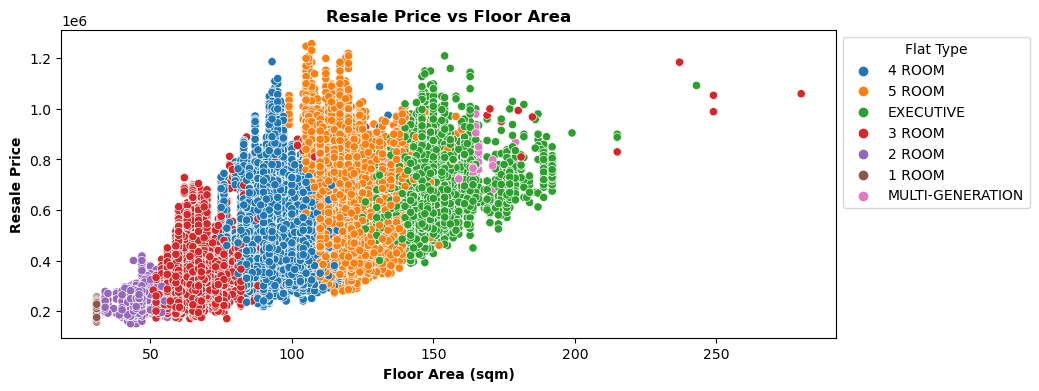

In [7]:
fig,axes = plt.subplots(figsize=(10,4))
sns.scatterplot(hdb, x='floor_area_sqm', y='resale_price', hue='flat_type', 
                legend='brief')
plt.title('Resale Price vs Floor Area', fontweight='bold')
plt.xlabel('Floor Area (sqm)', fontweight='bold')
plt.ylabel('Resale Price', fontweight='bold')
plt.legend(bbox_to_anchor=(1,1), title='Flat Type');

#### Which flat model is most popular for the resale market?

We can see that Model A and Improved are the most popular flat models.

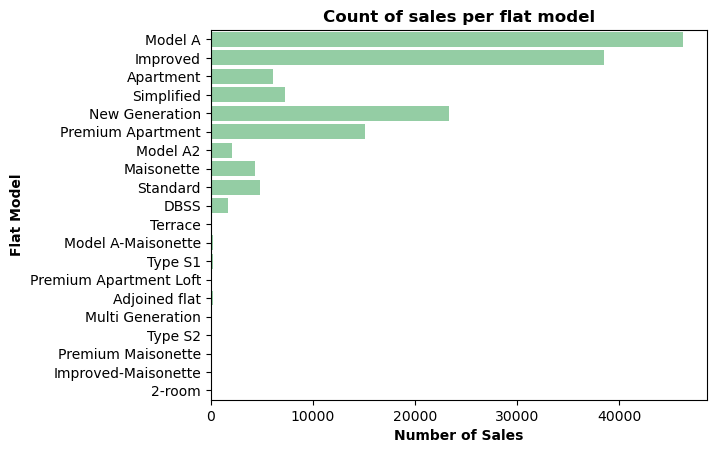

In [8]:
# Plot the count of sales per flat model
sns.countplot(hdb, y='flat_model', orient='h',color = '#8bd6a0')
plt.title('Count of sales per flat model', fontweight='bold')
plt.ylabel('Flat Model', fontweight='bold')
plt.xlabel('Number of Sales', fontweight='bold');

#### Which towns command the highest mean resale price?

From the bar plot below, Bukit Timah has the highest mean resale price. This area is also known to have a lot of landed property, hence it is an estate where the rich live in.

/var/folders/cy/2hh9tprx00z5ld32c942nw240000gn/T/ipykernel_72584/3536958216.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hdb_sorted = hdb.groupby('town', as_index=False).mean().sort_values(


Text(0.5, 1.0, 'Mean Resale Price per Town')

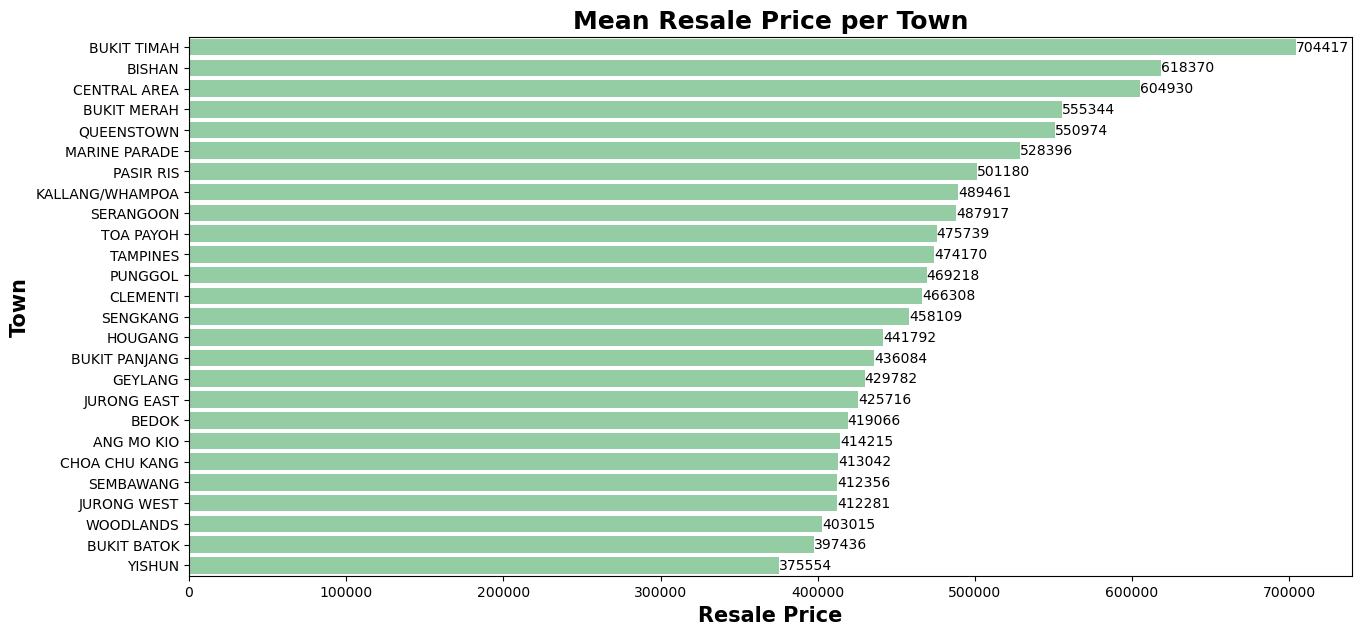

In [9]:
# Plot a bar plot with the mean resale price per town
hdb_sorted = hdb.groupby('town', as_index=False).mean().sort_values(
    'resale_price', ascending=False)

fig,axes = plt.subplots(figsize=(15,7))
sns.barplot(hdb_sorted, x='resale_price', y='town', estimator=np.mean, 
            orient='h', errorbar=None, color = '#8bd6a0')
axes.bar_label(axes.containers[0])
plt.xlabel('Resale Price', fontweight='bold', fontsize=15)
plt.ylabel('Town', fontweight='bold', fontsize=15)
plt.title('Mean Resale Price per Town', fontweight='bold', fontsize=18)

#### How has the mean prices of flats changed over the years

There was a dip in the resale price in 2013 due to cooling measures introduced by the Singapore Government. From 2020 onwards, the steep increase in price could be attributed to the pandemic, where a lot of Build-to-Order (BTO) projects were delayed and couples purchased flats in the resale market instead. 

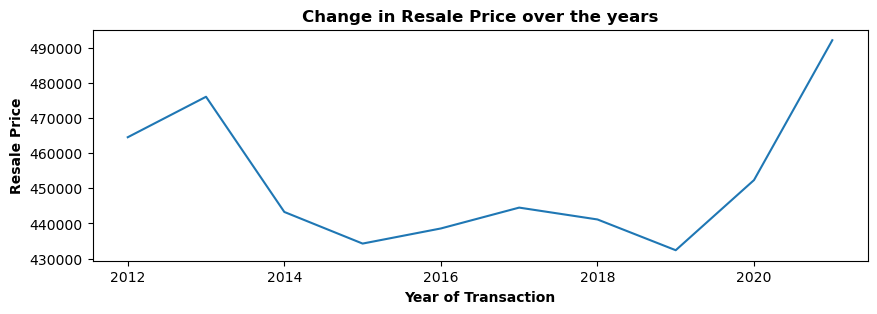

In [10]:
# Plot a lineplot to show the mean resale price per year
fig,axes = plt.subplots(figsize=(10,3))
sns.lineplot(hdb, x='tranc_year', y='resale_price', estimator='mean', 
             errorbar=None)
plt.xlabel('Year of Transaction', fontweight='bold')
plt.ylabel('Resale Price', fontweight='bold')
plt.title('Change in Resale Price over the years', fontweight='bold');

#### Are there any months where there are significantly more sales?

From the plot below, we can see that there is a significant amount of sales consistently throughout the year. However, the most sales happen in March. Perhaps this could be attributed to the anticipation of performance bonuses being paid out in April. 

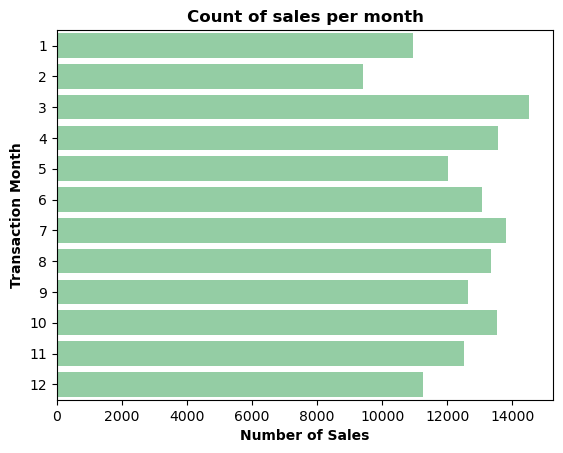

In [11]:
# Plot the count of sales per month
sns.countplot(hdb, y='tranc_month', orient='h',color = '#8bd6a0')
plt.title('Count of sales per month', fontweight='bold')
plt.ylabel('Transaction Month', fontweight='bold')
plt.xlabel('Number of Sales', fontweight='bold');

#### Number of flats sold per floor level

From the plot below, we can see that most of the sales occur for flats between the floors 5 to 11. In contrast, most HDBs have between 31 to 40 floors. Hence, most of the transactions are for the lower floor range in estates. As people generally prefer higher storeys, this could suggest that most of the flats avaialable for sale are in the lower storey range.

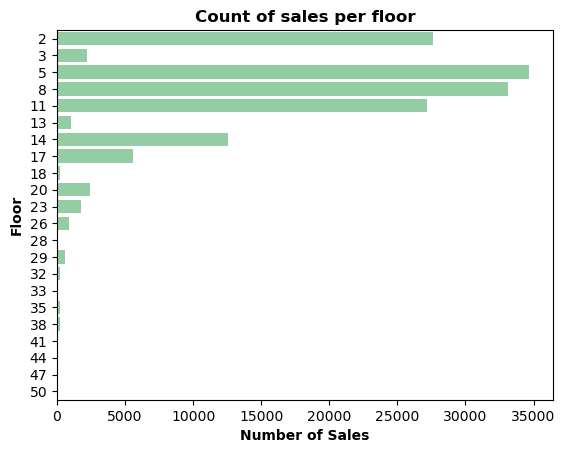

In [12]:
# Plot the count of sales per floor
sns.countplot(hdb, y='mid', orient='h',color = '#8bd6a0')
plt.title('Count of sales per floor', fontweight='bold')
plt.ylabel('Floor', fontweight='bold')
plt.xlabel('Number of Sales', fontweight='bold');

#### The effect of amenities distance from the flats

From the four plots below, we can see that the further the flat is from essential amenitites, the lower the resale price is. Bus stops are an exception, as even at 400m away, it is still a very walkable distance.

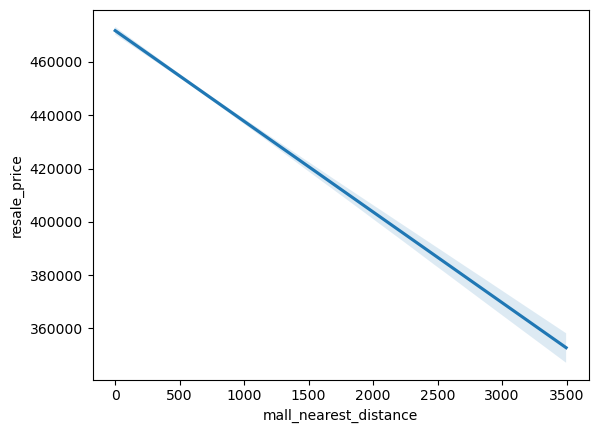

In [13]:
# Plot a regression line to observe the behavior between the nearest distance 
# of the amenity to the resale price
sns.regplot(hdb, x='mall_nearest_distance', y='resale_price', scatter=False);

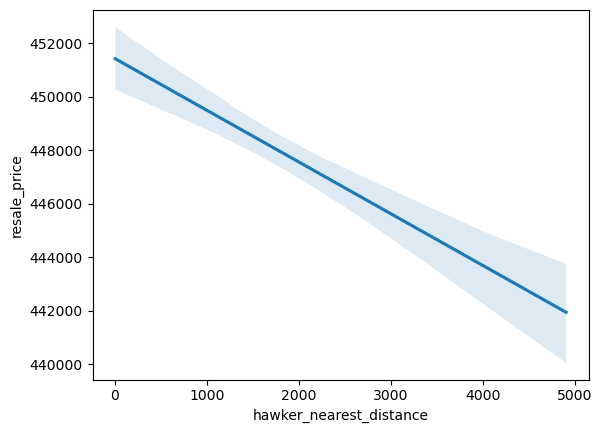

In [14]:
# Plot a regression line to observe the behavior between the nearest distance 
# of the amenity to the resale price
sns.regplot(hdb, x='hawker_nearest_distance', y='resale_price', scatter=False);

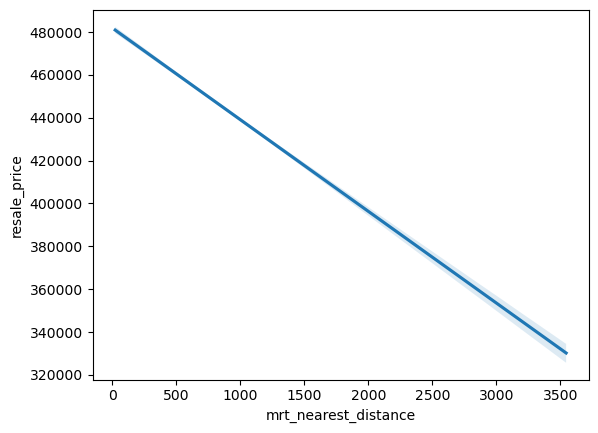

In [15]:
# Plot a regression line to observe the behavior between the nearest distance 
# of the amenity to the resale price
sns.regplot(hdb, x='mrt_nearest_distance', y='resale_price', scatter=False);

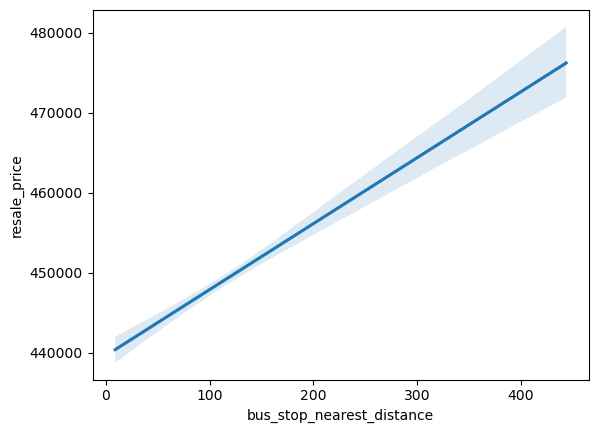

In [16]:
# Plot a regression line to observe the behavior between the nearest distance 
# of the amenity to the resale price
sns.regplot(hdb, x='bus_stop_nearest_distance', y='resale_price', 
            scatter=False);

#### Does the number of years left in the lease affect the number of flats sold?

From the plot below, we can see that most sales occur for flats with 60-80 years remaining in the lease. This could be attributed to the below points:  
* It is difficult to sell BTO flats in the first 5 years due to the minimum occupancy period
* For flats with less than 50 years on the lease, the occupant could have settled down for old age and intend to live there until they pass. They could also be hoping for enbloc since the estate would be quite old and the possibility for an estate redevelopment would be high

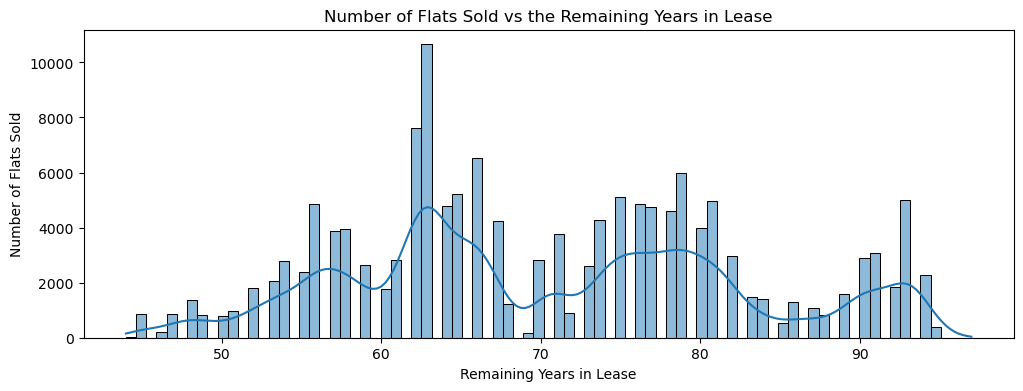

In [17]:
fig,axes = plt.subplots(figsize=(12,4))
sns.histplot(hdb, x='lease_remaining_years', kde=True)
plt.title('Number of Flats Sold vs the Remaining Years in Lease')
plt.xlabel('Remaining Years in Lease')
plt.ylabel('Number of Flats Sold');

#### Nex step

In the next notebook, we will proceed with the preprocessing of the data. 